# Introduction

This notebook contains two parts. **Part 1, Evaluating k-NN Classifiers**, provides you an opportunity to demonstrate your ability to apply course concepts to determine the ideal **_k_** for a k-NN Classifier on a contrived Iris data set. **Part 2, Classifying Handwritten Digits**, provides you an opportunity to practice using widely-used ML libraries and an ML workflow to solve a classification problem.

You do not need to complete Part 1 in order to complete Part 2. If you get stuck on Part 1, and choose to work on Part 2, be sure that all of your code for Part 1 runs without error. You can comment out your code in Part 1 if necessary.

# Part 1: Evaluating k-NN Classifiers

Given a simple KnnClassifier, and a complete data set of [Iris attributes](https://www.kaggle.com/datasets/uciml/iris), demonstrate your ability to:

1. Split a data set into appropriate training and test sets
2. "Train" a k-NN classifier
3. Repeatedly test a k-NN classifier, and collect generalization errors
4. Analyze the generalization error for different values of `k`
5. Identify the ideal `k` value for this classifier

## The Classifier Implementation

Let's first introduce the classifier, which you should find familiar, and you do not need to modify.

In [1]:
# A simple KnnClassifier. Uses Euclidean distance.

from math import sqrt

class KnnClassifier:

    def __init__(self, k = 1):
        self.k = k

    def train(self, training_set):
        self.training_set = training_set

    def test(self, test_set):
        number_of_correct_predictions = 0
        for example in test_set:
            prediction = self.predict(example[:-1])
            if prediction == example[-1]:
                number_of_correct_predictions += 1
        return number_of_correct_predictions / len(test_set)

    def predict(self, x):
        distances = {}
        for training_instance in self.training_set:
            distance = self._distance(training_instance[:-1], x)
            distances[distance] = training_instance[-1]
        k_nearest_keys = sorted(list(distances.keys()))[:self.k]
        k_nearest_labels = [distances[key] for key in k_nearest_keys]
        label_frequencies = {label:k_nearest_labels.count(label) for label in k_nearest_labels}
        frequencies = list(label_frequencies.values())
        labels = list(label_frequencies.keys())
        return labels[frequencies.index(max(frequencies))]

    def _distance(self, training_instance, x):
        sum_of_squares = 0
        for i in range(len(x)):
            sum_of_squares += (x[i] - training_instance[i])**2
        return "%.5f" % sqrt(sum_of_squares)

## The Data Set

There is no need for you to manually load the data set. We have provided the classic Iris data set here as a two-dimensional Python list, where each sub-list represents the attributes for one flower.

In [2]:
iris_data_set = [
    [5.1,3.5,1.4,0.2,'Iris-setosa'],
    [4.9,3.0,1.4,0.2,'Iris-setosa'],
    [4.7,3.2,1.3,0.2,'Iris-setosa'],
    [4.6,3.1,1.5,0.2,'Iris-setosa'],
    [5.0,3.6,1.4,0.2,'Iris-setosa'],
    [5.4,3.9,1.7,0.4,'Iris-setosa'],
    [4.6,3.4,1.4,0.3,'Iris-setosa'],
    [5.0,3.4,1.5,0.2,'Iris-setosa'],
    [4.4,2.9,1.4,0.2,'Iris-setosa'],
    [4.9,3.1,1.5,0.1,'Iris-setosa'],
    [5.4,3.7,1.5,0.2,'Iris-setosa'],
    [4.8,3.4,1.6,0.2,'Iris-setosa'],
    [4.8,3.0,1.4,0.1,'Iris-setosa'],
    [4.3,3.0,1.1,0.1,'Iris-setosa'],
    [5.8,4.0,1.2,0.2,'Iris-setosa'],
    [5.7,4.4,1.5,0.4,'Iris-setosa'],
    [5.4,3.9,1.3,0.4,'Iris-setosa'],
    [5.1,3.5,1.4,0.3,'Iris-setosa'],
    [5.7,3.8,1.7,0.3,'Iris-setosa'],
    [5.1,3.8,1.5,0.3,'Iris-setosa'],
    [5.4,3.4,1.7,0.2,'Iris-setosa'],
    [5.1,3.7,1.5,0.4,'Iris-setosa'],
    [4.6,3.6,1.0,0.2,'Iris-setosa'],
    [5.1,3.3,1.7,0.5,'Iris-setosa'],
    [4.8,3.4,1.9,0.2,'Iris-setosa'],
    [5.0,3.0,1.6,0.2,'Iris-setosa'],
    [5.0,3.4,1.6,0.4,'Iris-setosa'],
    [5.2,3.5,1.5,0.2,'Iris-setosa'],
    [5.2,3.4,1.4,0.2,'Iris-setosa'],
    [4.7,3.2,1.6,0.2,'Iris-setosa'],
    [4.8,3.1,1.6,0.2,'Iris-setosa'],
    [5.4,3.4,1.5,0.4,'Iris-setosa'],
    [5.2,4.1,1.5,0.1,'Iris-setosa'],
    [5.5,4.2,1.4,0.2,'Iris-setosa'],
    [4.9,3.1,1.5,0.1,'Iris-setosa'],
    [5.0,3.2,1.2,0.2,'Iris-setosa'],
    [5.5,3.5,1.3,0.2,'Iris-setosa'],
    [4.9,3.1,1.5,0.1,'Iris-setosa'],
    [4.4,3.0,1.3,0.2,'Iris-setosa'],
    [5.1,3.4,1.5,0.2,'Iris-setosa'],
    [5.0,3.5,1.3,0.3,'Iris-setosa'],
    [4.5,2.3,1.3,0.3,'Iris-setosa'],
    [4.4,3.2,1.3,0.2,'Iris-setosa'],
    [5.0,3.5,1.6,0.6,'Iris-setosa'],
    [5.1,3.8,1.9,0.4,'Iris-setosa'],
    [4.8,3.0,1.4,0.3,'Iris-setosa'],
    [5.1,3.8,1.6,0.2,'Iris-setosa'],
    [4.6,3.2,1.4,0.2,'Iris-setosa'],
    [5.3,3.7,1.5,0.2,'Iris-setosa'],
    [5.0,3.3,1.4,0.2,'Iris-setosa'],
    [7.0,3.2,4.7,1.4,'Iris-versicolor'],
    [6.4,3.2,4.5,1.5,'Iris-versicolor'],
    [6.9,3.1,4.9,1.5,'Iris-versicolor'],
    [5.5,2.3,4.0,1.3,'Iris-versicolor'],
    [6.5,2.8,4.6,1.5,'Iris-versicolor'],
    [5.7,2.8,4.5,1.3,'Iris-versicolor'],
    [6.3,3.3,4.7,1.6,'Iris-versicolor'],
    [4.9,2.4,3.3,1.0,'Iris-versicolor'],
    [6.6,2.9,4.6,1.3,'Iris-versicolor'],
    [5.2,2.7,3.9,1.4,'Iris-versicolor'],
    [5.0,2.0,3.5,1.0,'Iris-versicolor'],
    [5.9,3.0,4.2,1.5,'Iris-versicolor'],
    [6.0,2.2,4.0,1.0,'Iris-versicolor'],
    [6.1,2.9,4.7,1.4,'Iris-versicolor'],
    [5.6,2.9,3.6,1.3,'Iris-versicolor'],
    [6.7,3.1,4.4,1.4,'Iris-versicolor'],
    [5.6,3.0,4.5,1.5,'Iris-versicolor'],
    [5.8,2.7,4.1,1.0,'Iris-versicolor'],
    [6.2,2.2,4.5,1.5,'Iris-versicolor'],
    [5.6,2.5,3.9,1.1,'Iris-versicolor'],
    [5.9,3.2,4.8,1.8,'Iris-versicolor'],
    [6.1,2.8,4.0,1.3,'Iris-versicolor'],
    [6.3,2.5,4.9,1.5,'Iris-versicolor'],
    [6.1,2.8,4.7,1.2,'Iris-versicolor'],
    [6.4,2.9,4.3,1.3,'Iris-versicolor'],
    [6.6,3.0,4.4,1.4,'Iris-versicolor'],
    [6.8,2.8,4.8,1.4,'Iris-versicolor'],
    [6.7,3.0,5.0,1.7,'Iris-versicolor'],
    [6.0,2.9,4.5,1.5,'Iris-versicolor'],
    [5.7,2.6,3.5,1.0,'Iris-versicolor'],
    [5.5,2.4,3.8,1.1,'Iris-versicolor'],
    [5.5,2.4,3.7,1.0,'Iris-versicolor'],
    [5.8,2.7,3.9,1.2,'Iris-versicolor'],
    [6.0,2.7,5.1,1.6,'Iris-versicolor'],
    [5.4,3.0,4.5,1.5,'Iris-versicolor'],
    [6.0,3.4,4.5,1.6,'Iris-versicolor'],
    [6.7,3.1,4.7,1.5,'Iris-versicolor'],
    [6.3,2.3,4.4,1.3,'Iris-versicolor'],
    [5.6,3.0,4.1,1.3,'Iris-versicolor'],
    [5.5,2.5,4.0,1.3,'Iris-versicolor'],
    [5.5,2.6,4.4,1.2,'Iris-versicolor'],
    [6.1,3.0,4.6,1.4,'Iris-versicolor'],
    [5.8,2.6,4.0,1.2,'Iris-versicolor'],
    [5.0,2.3,3.3,1.0,'Iris-versicolor'],
    [5.6,2.7,4.2,1.3,'Iris-versicolor'],
    [5.7,3.0,4.2,1.2,'Iris-versicolor'],
    [5.7,2.9,4.2,1.3,'Iris-versicolor'],
    [6.2,2.9,4.3,1.3,'Iris-versicolor'],
    [5.1,2.5,3.0,1.1,'Iris-versicolor'],
    [5.7,2.8,4.1,1.3,'Iris-versicolor'],
    [6.3,3.3,6.0,2.5,'Iris-virginica'],
    [5.8,2.7,5.1,1.9,'Iris-virginica'],
    [7.1,3.0,5.9,2.1,'Iris-virginica'],
    [6.3,2.9,5.6,1.8,'Iris-virginica'],
    [6.5,3.0,5.8,2.2,'Iris-virginica'],
    [7.6,3.0,6.6,2.1,'Iris-virginica'],
    [4.9,2.5,4.5,1.7,'Iris-virginica'],
    [7.3,2.9,6.3,1.8,'Iris-virginica'],
    [6.7,2.5,5.8,1.8,'Iris-virginica'],
    [7.2,3.6,6.1,2.5,'Iris-virginica'],
    [6.5,3.2,5.1,2.0,'Iris-virginica'],
    [6.4,2.7,5.3,1.9,'Iris-virginica'],
    [6.8,3.0,5.5,2.1,'Iris-virginica'],
    [5.7,2.5,5.0,2.0,'Iris-virginica'],
    [5.8,2.8,5.1,2.4,'Iris-virginica'],
    [6.4,3.2,5.3,2.3,'Iris-virginica'],
    [6.5,3.0,5.5,1.8,'Iris-virginica'],
    [7.7,3.8,6.7,2.2,'Iris-virginica'],
    [7.7,2.6,6.9,2.3,'Iris-virginica'],
    [6.0,2.2,5.0,1.5,'Iris-virginica'],
    [6.9,3.2,5.7,2.3,'Iris-virginica'],
    [5.6,2.8,4.9,2.0,'Iris-virginica'],
    [7.7,2.8,6.7,2.0,'Iris-virginica'],
    [6.3,2.7,4.9,1.8,'Iris-virginica'],
    [6.7,3.3,5.7,2.1,'Iris-virginica'],
    [7.2,3.2,6.0,1.8,'Iris-virginica'],
    [6.2,2.8,4.8,1.8,'Iris-virginica'],
    [6.1,3.0,4.9,1.8,'Iris-virginica'],
    [6.4,2.8,5.6,2.1,'Iris-virginica'],
    [7.2,3.0,5.8,1.6,'Iris-virginica'],
    [7.4,2.8,6.1,1.9,'Iris-virginica'],
    [7.9,3.8,6.4,2.0,'Iris-virginica'],
    [6.4,2.8,5.6,2.2,'Iris-virginica'],
    [6.3,2.8,5.1,1.5,'Iris-virginica'],
    [6.1,2.6,5.6,1.4,'Iris-virginica'],
    [7.7,3.0,6.1,2.3,'Iris-virginica'],
    [6.3,3.4,5.6,2.4,'Iris-virginica'],
    [6.4,3.1,5.5,1.8,'Iris-virginica'],
    [6.0,3.0,4.8,1.8,'Iris-virginica'],
    [6.9,3.1,5.4,2.1,'Iris-virginica'],
    [6.7,3.1,5.6,2.4,'Iris-virginica'],
    [6.9,3.1,5.1,2.3,'Iris-virginica'],
    [5.8,2.7,5.1,1.9,'Iris-virginica'],
    [6.8,3.2,5.9,2.3,'Iris-virginica'],
    [6.7,3.3,5.7,2.5,'Iris-virginica'],
    [6.7,3.0,5.2,2.3,'Iris-virginica'],
    [6.3,2.5,5.0,1.9,'Iris-virginica'],
    [6.5,3.0,5.2,2.0,'Iris-virginica'],
    [6.2,3.4,5.4,2.3,'Iris-virginica'],
    [5.9,3.0,5.1,1.8,'Iris-virginica']
]

## What to Do

Demonstrate your understanding and ability to have synthesized course concepts by providing a walkthrough, with both code and prose, that demonstrates a simple ML workflow. Your goal is to pick an ideal **_k_** for the classifier and demonstrate a methodical justification for your selection. In the end, your work should reflect the principles seen thus far in the course.

Please be sure to demonstrate:

1. Splitting a data set into appropriate training and test sets
2. "Training" a k-NN classifier
3. Repeatedly testing a k-NN classifier with different values of `k`, and reporting the generalization errors for each `k`
4. Analyzing the generalization errors for different values of `k`
5. Identifying the ideal `k` value for this classifier, and justifying your selection by demonstrating a sound process (not just assertion)

### Tips

1. Be sure that you have spent time with the Exploration materials in this course.
2. Ask questions on the course forum if you get stuck (describe what you are trying to do, and errors that you encounter)
3. **Keep it simple.** This is more straightforward than it may initially seem.


## Splitting the data set into appropriate training and testing sets

I will use a simple holdout method for splitting the data into training and testing sets. The holdout method is holding back a pre-determined portion of the randomized data for testing and using the remaining portion to train the model. A general rule of thumb among practitioners is to use 80% for training and 20% for testing. 

I calculated how much 20% of the data would be, and after shuffling the data with the random library from Python I used that value to split the data into testing and training data sets with list slicing. I confirmed the results by printing the lengths of each list.

In [3]:
#import random to be able to randomly shuffle the data
import random

# Select a percentage of data to be witheld for testing
testing_percentage = 0.2

# Calculate the number of testing items needed for the specificed percentage
testing_number = int(len(iris_data_set) * testing_percentage)

# Randomly shuffle the data
random.shuffle(iris_data_set)

# Split the data into testing and training using indicies
iris_testing_data = iris_data_set[:testing_number]
iris_training_data = iris_data_set[testing_number:]

print("Testing: " + str(len(iris_testing_data)))
print("Training: " + str(len(iris_training_data)))

Testing: 30
Training: 120


Notice that there are 30 records for testing, and 120 records for training. That means that 20% of the data is saved for testing as is specified in the code (30 / (30 + 120) = 0.2).

## Training and Testing the kNN Classifier

The next step is to train and test the kNN classifier. The class "KnnClassifier" has already been provided above, so I just need to use the pre-defined methods. Before I can initialize the model, I must pick a k value. In the next few steps, I will iterate with several different k values to find the best one, but for now I just want to try and run the model once. It is best practice to start k as the value of the square root of the number of training records, which in this case is 11 (sqrt(120) = 10.95). After calculating this, I followed the methods to initialize, train, and test the model.


In [4]:
# Picking an intial k value. It's best practice to start with the square root of the number of training records
k_value = round(sqrt(len(iris_training_data))) # In our case, this rounds to 11.

#Intialize, train, and test the model
kNN_model = KnnClassifier(k=k_value)
kNN_model.train(iris_training_data) 
accuracy = kNN_model.test(iris_testing_data)

#Report the accuracy
print(accuracy)
    

0.9333333333333333


The reported generalization error for a k value of 11 is 96.7%.

## Testing for the ideal k

Now that the model has run successfully, I will test many different values of k to find the ideal value. I will use a for loop to run k values from 1 to 63 (inclusive). I picked this as the limit because it was around half of the training set, which would not be too useful in predicting 3 different classes because each prediction would include many objects of a different class. This is also when I began to see a consistent trend toward lower accuracies, which I will discuss in the next section.

I printed each k value and its generalization accuracy, which is the percent of correct classifications out of the 30 objects in the testing data set.


In [5]:
for k_value in range(1,64):
    
    # Intialize, train, and test the model
    kNN_model = KnnClassifier(k=k_value)
    kNN_model.train(iris_training_data) 
    accuracy = kNN_model.test(iris_testing_data)
    
    # Report the k_value and its associated accuracy
    print("K value of " + str(k_value) + " accuracy: " + str(accuracy))

K value of 1 accuracy: 0.9666666666666667
K value of 2 accuracy: 0.9666666666666667
K value of 3 accuracy: 0.9666666666666667
K value of 4 accuracy: 0.9666666666666667
K value of 5 accuracy: 0.9666666666666667
K value of 6 accuracy: 0.9666666666666667
K value of 7 accuracy: 0.9333333333333333
K value of 8 accuracy: 0.9333333333333333
K value of 9 accuracy: 0.9333333333333333
K value of 10 accuracy: 0.9333333333333333
K value of 11 accuracy: 0.9333333333333333
K value of 12 accuracy: 0.9333333333333333
K value of 13 accuracy: 0.9333333333333333
K value of 14 accuracy: 0.9333333333333333
K value of 15 accuracy: 0.9333333333333333
K value of 16 accuracy: 0.9333333333333333
K value of 17 accuracy: 0.9
K value of 18 accuracy: 0.9333333333333333
K value of 19 accuracy: 0.8666666666666667
K value of 20 accuracy: 0.9
K value of 21 accuracy: 0.9
K value of 22 accuracy: 0.9
K value of 23 accuracy: 0.9
K value of 24 accuracy: 0.9
K value of 25 accuracy: 0.9
K value of 26 accuracy: 0.9
K value of 

The accuracy bounces around from 90% to a max of 96.7% back to 90% and so on until k values reach greater than 54. At that point, there is a steady decline in accuracy, ending with an accuracy of 40% for the k value of 63. I suspect that the variability is a result of the simple method used to split the data and only perform one test. If something like stratified k-fold cross validation was used, I think the reported accuracies might be less variable.

## Picking the ideal k

Given the results above, the ideal k is 11. It is tied with many other k values for the highest accuracy score of 96.7%. I picked 11 over the others because it is one of the lowest values with such a high accuracy. A higher k value would help the model be more stable but would increase the computation time and be less interpretable. Both 10 and 3 also had accuracies of 96.7% and were lower than 11. I did not pick a k value of only 3 because it would make the model very sensitive to outliers and noise, and I did not pick 10 because the k value of 11 was surrounded by higher accuracies (k of 10 was 96.7%, k of 12 was 93.3%). Imagining the accuracy results plotted, a k value of 11 was near the middle of the high points in the plot. I thought this suggested that given different testing and training splits, a k value of 11 would perform better more consistently. I also felt comfortable with 11 because it was the suggested starting point for a k value based on the number of training objects in the data set.


In [6]:
# The final code

# The ideal k value I decided upon
k_value = 11

#Intialize, train, and test the model
kNN_model = KnnClassifier(k=k_value)
kNN_model.train(iris_training_data) 
accuracy = kNN_model.test(iris_testing_data)

#Report the accuracy
print(accuracy)

0.9333333333333333


## Conclusion

Write a review of what you did, some key decisions you made along the way and why you made those decisions, the end result, and what you might do next or experiment with next to achieve a higher performing classifier.

### 💡 Knowledge Check Part 1

In part 1, I learned how to split a data set into training and testing sets with the random library from Python. I tested k values for a kNN classifier model from 1 to 63, where I began to see a consistent drop off in accuracy values. I picked a k value of 11 because it had tied with others for the highest accuracy of 96.7% and was lower while not too low to destabilize the model. Next time, I would use a more advanced way to split the data like a stratified k-fold cross validation. This would give me a more complete view of the accuracy at each k value because each model is tested with all of the data.


<!-- This cell is intentionally blank -->
<!-- This cell is intentionally blank -->
<!-- This cell is intentionally blank -->
<!-- This cell is intentionally blank -->
<!-- This cell is intentionally blank -->
<!-- This cell is intentionally blank -->
<!-- This cell is intentionally blank -->


# Part 2: Classifying Handwritten Digits

In this, the second, part of this notebook, we will build a classifier that can assign a label, 0 - 9, to images of hand-written digits. We'll use a preprocessed subset of the well-known [MNIST database of handwritten digits](https://en.wikipedia.org/wiki/MNIST_database). Take a moment now to familiarize yourself with the subject matter of this data set, and take a look at the properties of [the UCI ML hand-written digits dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

## What to Do

We'll guide you one step at a time in this walkthrough of a k-NN workflow. Try out the code, answer the Knowledge Check questions along the way, and engage in a few challenges to exercise your understanding and have some fun.

## Problem Statement

We would like to "transform" sequences of handwritten digits into real numeric values that a computer can understand. For example, we would like a machine to be able to "read" a handwritten **8675309** and interpret each digit, resulting in the numeric string `8675309`. As such, we would like to construct a classifier that, as accurately as possible, can identify a visual representation of integers (pictures of handwritten numbers), and classify each image with one of ten labels: 0, 1, 2, 3, 4, 5, 6, 7, 8 or 9.

## Obtaining the data

For this experiment, we will get up and running quickly with [a subset of the MNIST data, bundled in the scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) library. First, let's import a typical toolkit of libraries, including pandas, matplotlib, and [scikit-learn](https://scikit-learn.org/stable/index.html).

```python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
```

Here we are importing two essential libraries, and giving them aliases `pd`, `plt`, and importing the `load_digits` function, which will give use our data set.

Let's load the data into memory as well, assigning it to a variable.

```python
digits = load_digits(as_frame=True)
```

Note that `load_digits` returns a [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch) object - not a pandas DataFrame. Review the [load_digits documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) to see what the attributes of our particular Bunch are. We pass `load_digits` the named argument `as_frame=True` up front now, so that we can access the data as a DataFrame later.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits(as_frame=True)

## Exploring the Data

Let's investigate the description, shape, feature names, and target label names of the `data` set stored in the Bunch. We know about these attributes from the documentation of [`load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). Try inspecting each of these properties one at a time.

```python
print(digits.DESCR)
digits.data.shape
digits.feature_names
digits.target_names

```


In [8]:
#print(digits.DESCR)
#digits.data.shape
#digits.feature_names
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 💡 Knowledge Check 1

1. How many individual handwritten characters are represented in the data set?

1797 individual characters.

2. How many dimensions are there, not counting the class label?

64 dimensions

3. What do the dimensions of each record represent? (What does one row of data have to do with a handwritten digit?)

Each dimension represents a different pixel. Each datapoint is an 8x8 image of a number, so there are 64 total pixels.


#### Exploring the DataFrame

Now, let's access the data as a pandas DataFrame, for convenience and some quick summary stats.

```python
frame = digits.frame
frame
```

Here we are obtaining the DataFrame, and inspecting it within the notebook.


In [9]:
frame = digits.frame
frame

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Let's investigate some summary statistics with `describe`.

```python
frame.describe()
```

In [10]:
frame.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


We know from `DESCR` that the pixel values range from 0 to 16, and our quick survey of `describe` seems to confirm this, so we'll move forward with our assumptions about the data set. (In addition, `DESCR` promises us that there are no missing values - the preprocessing work has been done.)

### 💡 Knowledge Check 2

Based on the summary statistics, what is interesting about attribute *pixel_0_0*, and what do those interesting qualities lead you to conclude? Please describe it in very approachable terms, regarding the handwritten images, that anyone can understand.

The pixel_0_0 is interesting because the value is always 0. My best guess is that the pixel was intentionally left blank as a control measure for when the programs by NIST extracted the values from the handwritten forms. If there were values in that pixel, the reseachers would know something was wrong with the extraction process.

## Visualize the Data

Let's take a visual look at one of the images. The `digits` Bunch has a property, `images`, that is an array of all of the raw image data. Let's access one image and visualize it on the screen.

```python
plt.gray()
plt.matshow(digits.images[0])
plt.show()
```


<Figure size 640x480 with 0 Axes>

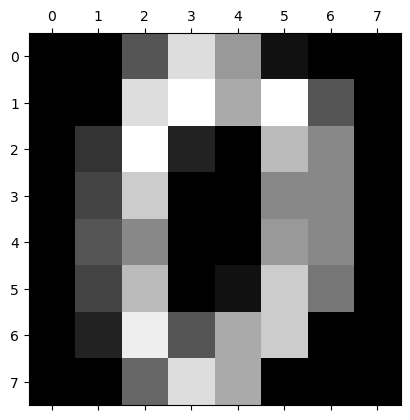

In [11]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### 💡 Knowledge Check 3

1. The figure is drawn at a scale of 640x480 pixels, but how many pixels wide and tall are the actual character images?

The actual character images are 8x8 pixels.

2. What does this have to do with the dimensions of the data set?

This is why there are 64 features (or 64 dimensions), because 8x8=64. There are a total of 64 pixels, and each pixel has a number assigned to it from 0 to 16. These 64 numbers are the features for each character.

## Prepare the Training and Validation Sets

With preprocessing gratefully handled for us, we now turn to creating our training set and validation sets. While we could manually implement our own sampling technique, this time we will lean on the `sklearn.model_selection.train_test_split` method. Be sure to check out the documentation for [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
```

Notice how we pass `train_test_split` two arrays: one array, `digits.data`, containing all of the attributes except the class label dimension, and a second array, `digits.target`, containing the class labels for each record in the data set. We also specify that we'd like to use 80% of the records for training, and 20% of the records for testing. (Here we are also assigning `0` to `random_state`, and this is only for the sake of this exercise, to control the random seed so that running our notebook repeatedly gives us the same, albeit randomized, sampling.)

The function `train_test_split` returns four arrays, conveniently splitting our complete data set into randomized training and validation sets:

- `X_train`: our training records, without the class labels
- `y_train`: the class labels for our training records
- `X_test`: our validation records, without the class labels
- `y_test`: the class labels for our validation records

This is a very common naming convention we see in practice, so we'll abide by it here.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

## Instantiate and "Train" our Classifier

We'll next instantiate a k-NN classifier provided by scikit-learn: the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Please be sure to read the documentation, noticing both the parameters we can pass the KNeighborsClassifier initializer, such as the distance metric to use, and in particular, `n_neighbors` which is our **_k_**.

We'll rely on some defaults, but start with a fairly unsurprising **_k_**, the square root of the number of records in the training set.

```python
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = int(sqrt(len(X_train))))
```

Import the KNeighborsClassifier and instantiate it the next code cell.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = int(sqrt(len(X_train))))

Next, we have to "train our model," but, as we know, k-NN classifiers are instance-based learners with no initial training computation. All we need to do is provide the classifier with the training data.

```python
classifier.fit(X_train, y_train)
```

Here we invoke the commonplace `fit` method found in tha API of many pre-built classification models. Here, we simply pass it our training data.

In [14]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37)

### 💡 Knowledge Check 4

Using the documentation, investigate the other "nearest neighbor" classifiers in the scikit-learn library, in the `sklearn.neighbors` namespace. Identify (name) two other classifiers, and briefly describe how they are different from KNeighborsClassifier. Don't just regurgitate the documentation - do a little online sleuthing to see how they are useful, and share that information here.

The`RadiusNeighborsClassifier` is different than the `KNeighborsClassifier` because instead of considering a fixed number of neighbors k, it considers all neighbors within a fixed radius. This classifier is useful when there is a non-uniform distribution of samples, so a fixed number of neighbors is not ideal for differentiating between every class.

`NearestCentroid` is different than the `KNeighborsClassifier` because instead of looking at individual neighbors, it calculates the centroid of the training samples for each class. Then the predictions are made based on the closest centroid point. This would work well where classes are well-separated, but would not be ideal for overlapping or noisy data sets. 


## Validate (Test) Our Classifier

The next step in our ML process is to see how well our classifier performs, given our training set and, in this case, our initial **_k_**. We'll ask the classifier to predict the class label for every record in our validation set, `X_test`. Then, we'll compare those predictions with the actual class labels, in `y_test`, and compute an accuracy score. Rather than do this manually, we'll rely on the scikit-learn [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function. Be sure to read the documentation for `accuracy_score`.

```python
from sklearn.metrics import accuracy_score

y_predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)
```

Here we invoke the KNeighborsClassifier `predict` method, which returns an array of predicted class labels for each record in `X_test`, that we assign to `y_predictions`. We then pass `accuracy_score` the known correct class labels for the validation set, `y_test`, and the predicted labels, `y_predictions`, and let it make the comparisons, tally up the correct matches, and compute and return an accuracy score between 0 and 1.


In [15]:
from sklearn.metrics import accuracy_score

y_predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)

Now, let's inspect that accuracy score by simply printing it.

```python
print(accuracy)
```


In [16]:
print(accuracy)

0.9611111111111111


Hm - not bad!

There's one more way we can analyze the performance of our classifier: by inspecting a matrix of expected vs predicted class labels, known as a *confusion matrix*. For each cell in the matrix, we'll see the number of predictions, whether right or wrong, made for each of the known class labels.

We'll reach for the scikit-learn [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to generate a confusion matrix for us.

```python
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predictions)
```

We import the `confusion_matrix` function, and then invoke it, passing it the expected class labels in the validation set, `y_test`, and the predicted labels, `y_predictions`. It returns, in essence, a matrix, which we assign to `confusion_matrix`.


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predictions)

Now, let's inspect the confusion matrix by simply printing it.

```python
print(confusion_matrix)
```

In [18]:
print(confusion_matrix)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 1  0 32  1  0  0  0  1  1  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  1  0  0  1  1 33  0]
 [ 0  0  0  0  0  1  0  1  0 39]]


The horizontal axis of a confusion matrix represents the predicted labels, and the vertical axis represents the correct class labels. Each entry in the matrix represents the number of images predicted to have that class label.

Notice how well this classifer performed, with our default **_k_**, euclidean distance, and a (luckily!) high-quality data set. We can see the 27 of the **0** handwritten images are correctly classified, and none are misclassified. If we look at the last row in the confusion matrix, we see that 39 of the **9** images are correctly classified, but one was classified as a **5**, and another classified as a **7**.

### But, can you do better?

### 💡 Knowledge Check 5

Inspect the confusion matrix. Which handwritten letter seemed to be the "hardest" for our classifier to predict correctly? What evidence in the confusion matrix leads you to assert this?

8 seemed to be the hardest for the classifier to predict correctly. I say this because it had the most errors. 3 times an 8 was predicted as a 1, once as a 3, once as a 6, and once as a 7.

## Tune the Classifier: Find the Best **_k_**

Now it's your turn. Given what we have seen in the course thus far, and the `sklearn` API seen in this notebook, create an iterative experiment that inspects the accuracy of different classifiers using different **_k_** values. Your goal is to configure a classifier that exhibits the highest possible accuracy. Start your experiment with the traditional initial **_k_**, the square root of the number of records in the training set.

Your experiment should demonstrate:

- Creating KNeighborsClassifiers with different **_k_** values
- "Training" and validating the classifiers
- Capturing and presenting the accuracy for each **_k_**

Keep your experiment simple. (Hint: Use a loop.)

Conclude your experiment with a markdown cell that asserts your proposed **_k_**, the accuracy of your classifier, and what leads you to choose this value of **_k_**.


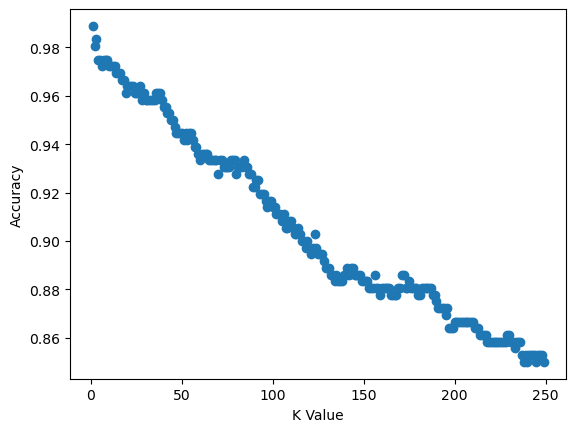

In [19]:
# 💡 Knowledge Check 6 Code

# Dictionary to store accuracy values
accuracy_dict = {}

# Initial k is 37
for k_value in range(1,250):
    classifier = KNeighborsClassifier(n_neighbors = k_value)
    classifier.fit(X_train, y_train)
    y_predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_predictions)
    accuracy_dict[k_value] = accuracy

x = accuracy_dict.keys()
y = accuracy_dict.values()
plt.scatter(x,y)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [20]:
from itertools import islice
first_n_items = dict(islice(accuracy_dict.items(), 5))
print(first_n_items)

{1: 0.9888888888888889, 2: 0.9805555555555555, 3: 0.9833333333333333, 4: 0.975, 5: 0.975}


### 💡 Knowledge Check 6

Conclude your experiment with a brief assertion of your proposed **_k_**, the accuracy of your classifier, and what led you to choose this value of **_k_**.

I would propose a k value of 3. The accuracy my of classifier is 98.3%. I chose this value of k because it gave me a very high accuracy. The only k value with a higher accuracy was a k value of 1, which gave me 98.9% accuracy. While this is technically better, having only 1 neighbor involved in the decision would make it very sensitive to noise and outliers in the data. I am also worried it may be overfitting the data. I picked 3 to make the model a bit more stable and still maintain the high accuracy. The plot above shows the trend that the accuracy decreased the more I increased the k value.



# Conclusion

Congratulations on finishing an authentic machine learning workflow! While our dataset is of high quality, and the drama of preprocessing is abbreviated, we hope that this notebook enables you to see how we can use ML tools to carry out much of the machine learning process.

Please wrap up this notebook with a brief narrative.

### 💡 Knowledge Check 7

Imagine that a "person on the street" (or your twelve-year-old relative) asks you, "What does it take for a computer to recognize handwritten characters that get scanned and turned into computable numbers?" Rely on our journey through this notebook, infer and deduce what you can as necessary, but be mindful of your audience: please explain things in a manner befitting someone who knows nothing about these things.

Conclude with your assertion about whether or not character recognition is an "easy" or "very difficult" machine learning problem, and whether or not this surprises you.

The first step for computers to be able to recognize handwritten characters is turning an image of a character into numbers that can represent it. The character needs to be bound by a box, and then that box needs to be separated into a grid of more boxes, also called pixels. The pixel is the smallest unit of a picture, and can be represented as a number, which represents the color that it shows. In the case of characters, each number would represent the intensity of color, say 0 for white (blank) and 1 for completely black. If it was gray, the number could be 0.5. Then, each image, consisting of these pixels, could be represented by a row of numbers. Each number in the row would represent how dark the pixel is. This is how computers store pictures in memory.

Now that we have characters stored as rows of numbers (like in a picture), we can start collecting lots of pictures of characters and grouping them together. Many people writing '3' would likely fill in the same pixels with ink over and over, which would show as a distinct pattern in the row of numbers. With a lot of data collected and labeled with the correct character they represent, the computer can compare new characters with the patterns in the row of numbers it has in memory. It can then group the new character image with a known group of character images, thereby recognizing handwritten characters.

I think character recognition is an easy machine learning problem. We know what is different about each character and know how to feed that information into a computer. This does not surprise me.

